# Support Vector Regression

Support Vector Regression(SVR) is a type of Support Vector Machine (SVM) that is commonly used for regression tasks, unlike SVM that is commonly used for classification. It was proposed by Vladimir Vapnik, Harris Drucker, Christopher J. C. Burges, Linda Kaufman and Alexander J. Smola in the 1996.

In notebook we will see some example in 2D to understand how it works and the difference with SVM but SVR is not limited to 2D data, it can be used for high-dimensional data as well and so in the last part of notebook we will see a real case study with a dataset with n-dimension(n>2).

Similar to SVM for classification, SVR relies on Support Vectors. In regression, however, these are not the points closest to the central prediction line; rather, they are the data points located on the boundary of the tube or outside it. This method introduces a specific loss function that approximates the output data so that the error is minimized but ignored if it falls within a certain threshold (ϵ). The parameter ϵ is added to the model to obtain a sparse solution: the standard quadratic loss function (typical of Linear Regression) is replaced with the ϵ-insensitive error function. This means that errors within a distance ϵ from the true value are not penalized (zero loss).


## Introduction

In the following example we can see how use a SVM for classification, in particular a Linear SVM. It's interesting to go and understand later in the next code which is the difference between SVM and SVR.
To run the code we use sklearn library to call SVC(Support Vector Classification), matplotlib it's useful to plot the final result and numpy it's useful to create some random points.

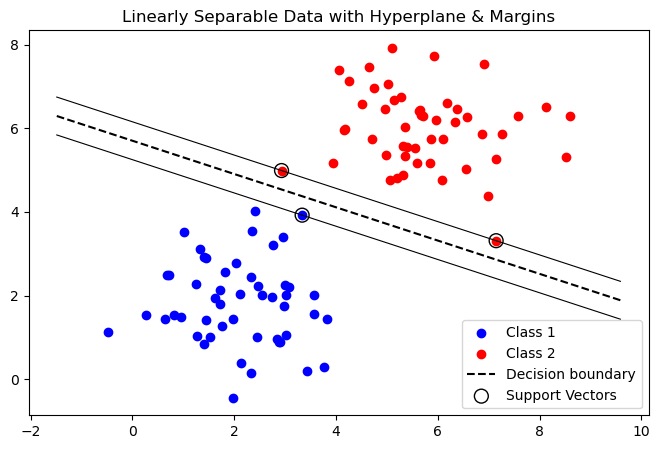

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sample import pipeline

# Random data generation in 2D
x1 = np.random.randn(50, 2) + np.array([2, 2])  # Put the center in (2,2)
x2 = np.random.randn(50, 2) + np.array([6, 6])  # Put the center in (6,6)
X = np.vstack((x1, x2))
y = np.hstack((np.zeros(50), np.ones(50)))

# Fit Linear SVM model
clf = SVC(kernel="linear", C=100)
clf.fit(X, y)

w = clf.coef_[0]  # Get the weights of the hyperplane
b = clf.intercept_[0]  # Get the bias term

xx = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
yy = -(w[0] / w[1]) * xx - b / w[1]

margin = 1 / np.linalg.norm(w)  # Calculate margin
# Calculate margin lines
yy_down = yy - np.sqrt(1 + (w[0] / w[1]) ** 2) * margin
yy_up = yy + np.sqrt(1 + (w[0] / w[1]) ** 2) * margin

# Plotting
plt.figure(figsize=(8, 5))

plt.scatter(x1[:, 0], x1[:, 1], color='blue', label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], color='red', label='Class 2')

plt.plot(xx, yy, 'k--', label="Decision boundary")

plt.plot(xx, yy_down, 'k-', linewidth=0.8)
plt.plot(xx, yy_up, 'k-', linewidth=0.8)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k',
            label="Support Vectors")

plt.title("Linearly Separable Data with Hyperplane & Margins")
plt.legend()



In the previous code we use some fomula to calculate the hyperplane and the margin lines. The hyperplane is defined by the equation $ w^T x + b = 0 $, where $ w $ is the weight vector and $ b $ is the bias term. The margin lines are parallel to the hyperplane and are located at a distance of $ \frac{1}{\|w\|} $ from it.

In the case above, we generated two sets of 2D data points. It's a good example to highlight type of data where Linear SVM can work. It's a good example of classification problem where Linear SVM can work.
Now the problem is that not always the data are linearly separable so, in that case, we must use other type of SVM. In the follow example we can see an example of non linearly separable data.

In the preview code we can see a good example of classification but now with SVR we will see a different process.

## SVR

### Regression
Support Vector Regression (SVR) is a supervised learning algorithm used for the estimation of continuous variables. Theoretically derived from Support Vector Machines (SVM) for classification, it extends its functionality to the domain of regression. Its goal is not to find a function that exactly matches all the points but rather to find a trade-off between accuracy and generalization of the function.

Below we can see an implementation of SVR with Linear Kernel. This s an easy example to understand how SVR works and what see a regression problem.


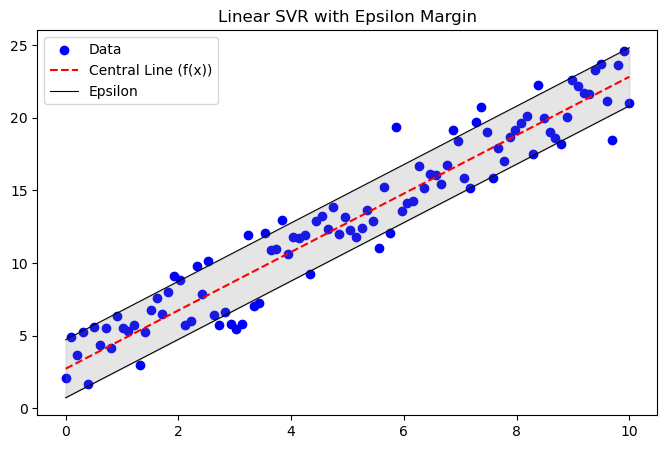

In [6]:
from sklearn.svm import SVR

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.ravel() + 3 + np.random.randn(100) * 2

# Fit Linear SVR model
svr = SVR(kernel='linear', epsilon=2)
svr.fit(X, y)

y_pred = svr.predict(X)

# Definition of epsilon interval
epsilon = svr.epsilon
y_up = y_pred + epsilon
y_down = y_pred - epsilon

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, 'r--', label='Central Line (f(x))')
plt.plot(X, y_up, 'k-', linewidth=0.8, label='Epsilon')
plt.plot(X, y_down, 'k-', linewidth=0.8)
plt.fill_between(X.ravel(), y_down, y_up, color='gray', alpha=0.2)
plt.legend()
plt.title("Linear SVR with Epsilon Margin")
plt.show()


It's easy implement SVR with sklearn library. In the example above we generated some 1D data with a linear relationship and some noise. We then fit a Linear SVR model to the data and plotted the results, including the $ \varepsilon $ margin.

The parameter $ \varepsilon $ defines the width of the epsilon-insensitive tube around the regression function.
- Small $ \varepsilon $: the model becomes more sensitive to small deviations from the true values, leading to a tighter fit to the training data.
- Large $ \varepsilon $: the model allows for larger deviations from the true values without penalty, resulting in a smoother and more generalized function.

# Mathematical Formulation
Most of the mathematical formulation are find in Bishop's book "Pattern Recognition and Machine Learning".

SVR aims to find the function:

\begin{gather*}
y_i = w^T \phi(x_i) + b
\end{gather*}


that approximates the data $ (x_i, y_i) $ within a tolerance $ \varepsilon $.
$\varepsilon$-insensitive $E_\varepsilon$ is given by:
$$E_{\varepsilon}(y(\mathbf{x}) - t) = \begin{cases} 0 & \text{se } |y(\mathbf{x}) - t| < \epsilon \\ |y(\mathbf{x}) - t| - \varepsilon & \text{altrimenti} \end{cases} \quad$$

With this formula, we penalize only the points outside the tube(t is the target). Unlike standard least squares regression (which uses a quadratic loss), here the error grows linearly, so the weight assigned to outliers is lighter (less penalizing).

Minimizing model complexity(we want a flat function to avoid overfitting) and errors outside the $ \varepsilon-insensitive $ tube:

\begin{gather*}
\min_{w, b, \xi_i, \xi_i^*} \quad \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{m} (\xi_i + \hat{\xi_i})
\end{gather*}

With:
-  $ \quad \frac{1}{2} \|w\|^2 $ : complexity of the model (we want to minimize it). If $ \|w\| $ is high, there can be much steeper slopes(change value fast).
-  The second part is for the errors outside the epsilon-intensitive tube.

subject to:
- For points above the tube:    $ y_i - w^T \phi(x_i) - b \leq \varepsilon + \xi_i $
- For points below the tube:    $ w^T \phi(x_i) + b - y_i \leq \varepsilon + \hat{\xi_i} $
- Slack variables must be non-negative:     $ \xi_i, \hat{\xi_i} \geq 0 $

Where:
- $ w $ are the model weights.
- $ b $ is the bias.
- $ \varepsilon $ defines the epsilon-insensitive tube.
- $ \xi_i, \hat{\xi_i} $ are slack variables for errors outside the tube.
- $ C $ balances model complexity versus tolerance of errors.

This formulation can be write in another easy way, without the slack variables only if the problem is feasible.  If the problem is not feasible, we introduce slack variables, which are the data points that fall outside of the ε-insensitive tube.
In real cases, most of time the problem is not feasible because it's very strange that all data points fall in the right way.

To minimize the objective function we can use the method of Lagrange multipliers, introducing multipliers $ \alpha_n \geq 0, \hat{\alpha_n} \geq 0 $ and $ \mu_n \geq 0, \hat{\mu_n} \geq 0 $. Now we optimize the Lagrangian:
\begin{gather*}
L = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{m} (\xi_i + \hat{\xi_i}) - \sum_{i=1}^{m} \alpha_i (\varepsilon + \xi_i + w^T \phi(x_i) + b - t_i) - \sum_{i=1}^{m} \hat{\alpha_i} (\varepsilon + \hat{\xi_i} - w^T \phi(x_i) + b + t_i) - \sum_{i=1}^{m} (\mu_i \xi_i + \hat{\mu_i} \hat{\xi_i})
\end{gather*}

I have change $ y_n $ with $ w^T \phi(x_i) + b $. In the formula above We have the original problem, the two tube constrains(up and down) and non negative constrains.

And now we must find the derivatives and set them to zero:
\begin{gather*}
\frac{\partial L}{\partial w} = 0 \Rightarrow w = \sum_{i=1}^{m} (\alpha_i - \hat{\alpha_i}) \phi(x_i) \\
\frac{\partial L}{\partial b} = 0 \Rightarrow \sum_{i=1}^{m} (\alpha_i - \hat{\alpha_i}) = 0 \\
\frac{\partial L}{\partial \xi_i} = 0 \Rightarrow \alpha_i + \mu_i = C \\
\frac{\partial L}{\partial \hat{\xi_i}} = 0 \Rightarrow \hat{\alpha_i} + \hat{\mu_i} = C
\end{gather*}

Now we can substitute the derivatives in the Lagrangian and obtain the dual problem:
\begin{gather*}
\tilde{L}(\boldsymbol{a}, \hat{\boldsymbol{a}}) = -\frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} (\alpha_i - \hat{\alpha_i})(\alpha_j - \hat{\alpha_j}) K(x_i, x_j) - \varepsilon \sum_{i=1}^{m} (\alpha_i + \hat{\alpha_i}) + \sum_{i=1}^{m} t_i (\alpha_i - \hat{\alpha_i})
\end{gather*}



How can we say we introduce the kernel $ K(x_i, x_j) =  \phi(x_i)^T \phi(x_j) $, with this method we have a linear product.
Now, we have a constrained maximization problem but we can note that we have $a_i \geq 0$ and $\hat{a_i} \geq 0$ and $ \mu_n \geq 0, \hat{\mu_n} \geq 0 $ as before. So, thanks to Laplacian derivated we have:
\begin{gather*}
0 \leq \alpha_i \leq C \\
0 \leq \hat{\alpha_i} \leq C
\end{gather*}

And I can put all in the first function that it's write in this chatper to obtain:
\begin{gather*}
y(\boldsymbol{x}) = \sum_{i=1}^{m} (\alpha_i - \hat{\alpha_i}) K(x_i, x) + b
\end{gather*}

with kernel function.
The corrisponding Karush-Kuhn-Tucker (KKT) conditions(that are a generalization of the method of Lagrange multipliers and thay are useful for solving optimization problems with constraints), are given by:
\begin{gather*}
\alpha_i (\varepsilon + \xi_i + w^T \phi(x_i) + b - t_i) = 0 \\
\hat{\alpha_i} (\varepsilon + \hat{\xi_i} - w^T \phi(x_i) + b + t_i) = 0 \\
(C - a_n)\xi_i = 0 \\
(C - \hat{a_n})\hat{\xi_i} = 0 \\
\end{gather*}

From that we can see that:
- $ \alpha_i \neq 0 $ if and only if $ (\varepsilon + \xi_i + w^T \phi(x_i) + b - t_i) = 0 $
    - if $ \xi_i = 0 $ then $ |y(x_i) - t_i| = \varepsilon $ (on the boundary of the tube)
    - if $ \xi_i > 0 $ then $ y(x_i) - t_i > \varepsilon $ (outside the tube)
- Same for $ \hat{\alpha_i} $
- We have $ \varepsilon $ that is strictly positive and $ \xi_i, \hat{\xi_i} $ that are non-negative
    - So we have that $ \forall x_i $, either $ \alpha_i = 0 $, $ \hat{\alpha_i} = 0 $ or both.

During the computation, we can only consider the data points for which $ \alpha_i $ or $ \hat{\alpha_i} $ are non zero. These points are called support vectors and they define the regression function. All point that are equal to zero are in the limit of the epsilon-insensitive tube and all the point that are outside the tube have $ \alpha_i = C $ or $ \hat{\alpha_i} = C $(that we can change in our code).

To compute $ b $ we can use the KKT conditions. For any support vector $ x_i $ with $ 0 < \alpha_i < C $ or $ 0 < \hat{\alpha_i} < C $, we have $ \xi_i = 0 $ or $ \hat{\xi_i} = 0 $. So, we can rearrange the KKT conditions to solve for $ b $:
\begin{gather*}
b = t_i - w^T \phi(x_i) - \varepsilon = t_i - \varepsilon - \sum_{i=1}^{m} (\alpha_i - \hat{\alpha_i}) K(x_i, x) \quad \text{if } 0 < \alpha_i < C \\
b = t_i - w^T \phi(x_i) + \varepsilon = t_i + \varepsilon \sum_{i=1}^{m} (\alpha_i - \hat{\alpha_i}) K(x_i, x) \quad \text{if } 0 < \hat{\alpha_i} < C
\end{gather*}

## Non-linear SVR with polynomial kernel
Now we can try to use a non-linear kernel, that can be polynomial, RBF or Sigmoid kernel. Non-linear SVR can capture more complex relationships in the data compared to linear model.
The formula in the previous setting are both for linear and polynomial kernel, the only difference is the kernel function $ K(x_i, x_j) $.

I change the random points configuration to have a more complex shape.

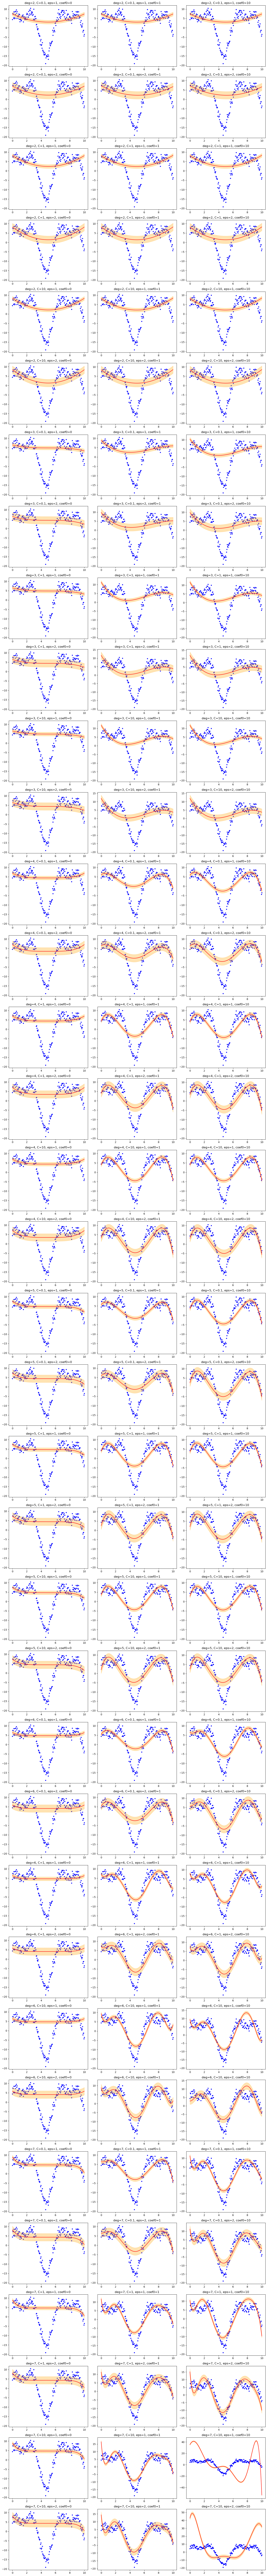

In [10]:
from joblib import Parallel, delayed
import itertools


X = np.linspace(0, 10, 200).reshape(-1, 1)
y = np.sin(X.ravel()) * 10 + np.cos(2 * X.ravel()) * 5 + np.random.randn(200) * 1.5

# Hyperparameter grid(We can change this)
param_grid = {
    "degree": [2, 3, 4, 5, 6, 7],
    "C": [0.1, 1, 10],  # If increase the model became more complex and less tollerance to error
    "epsilon": [1, 2],  # This is for the tube
    "coef0": [0, 1, 10]
}

param_combinations = list(itertools.product(
    param_grid["degree"],
    param_grid["C"],
    param_grid["epsilon"],
    param_grid["coef0"]
))


def fit_and_predict(params):
    degree, C, eps, coef0 = params

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svr", SVR(kernel="poly", degree=degree, C=C, epsilon=eps, coef0=coef0))
    ])

    model.fit(X, y)
    y_pred = model.predict(X)
    return (params, y_pred)


# This is to parallelize all the process. With -1 we use all core. Delayed is used to put value into fit_and_predict and send all to a different core all time
results = Parallel(n_jobs=-1, verbose=0)(delayed(fit_and_predict)(p) for p in param_combinations)

# Plot
n = len(results)
cols = 3
rows = int(np.ceil(n / cols))

plt.figure(figsize=(5 * cols, 4 * rows))

for idx, (params, y_pred) in enumerate(results, 1):
    degree, C, eps, coef0 = params

    plt.subplot(rows, cols, idx)
    plt.scatter(X, y, color='blue', s=10)
    plt.plot(X, y_pred, color='red')
    plt.fill_between(X.ravel(), y_pred - eps, y_pred + eps, color='orange', alpha=0.3)
    plt.title(f"deg={degree}, C={C}, eps={eps}, coef0={coef0}")
    plt.tight_layout()

plt.show()


You can see that with polynomial kernel we can capture more complex relationships in the data. The parameter $ degree $ controls the flexibility of the polynomial kernel: higher degrees allow the model to fit more complex patterns but also increase the risk of overfitting. In fact, with a very high degree, the model may fit the noise in the training data instead of the underlying trend, leading to poor generalization on new data.
$ coef0 $ shifts the polynomial kernel, allowing lower-degree terms to influence the model and making it more flexible.
The parameter $ C $ in an SVR controls the trade-off between model complexity and training error.
- Small $ C $: the model becomes “softer,” meaning it allows more errors to keep a larger margin or simpler function. This can help prevent overfitting but may increase training error.
- Large $ C $: the model tries to minimize training errors, even if this means a narrower margin or more complex function. This can improve accuracy on the training set but increases the risk of overfitting on new data.

This is the Kernel formula: $$
K(x, x') = (\gamma \langle x, x' \rangle + \text{coef0})^{d}
$$

It's interesting see all the difference all the plot above. In some case we have overfitting, in other case underfitting and in other case a good fit. It's important to find a right set up with a good trade off.

You can try to change the parameters of $ c, degree, epsilon $ and $ coef0 $(it's unuseful in linear and RBF) to see how they affect the model. Remember that the time of computation can increase with the increase of the parameters.
It's clear that if you put an high degree like the last example there.

There are other type of kernel that We can try like RBF kernel or Sigmoid kernel.




## RBF Kernel

The RBF kernel (Radial Basis Function) measures similarity between points based on their distance from each other. “Radial” means the function depends only on the distance from a center and “basis function” refers to using these localized bumps to build the model. The parameter gamma controls how quickly similarity decreases: large gamma makes the model focus on nearby points (more complex), small gamma makes it smoother and more global.
If gamma is too large, the model may overfit the training data, capturing noise instead of the underlying pattern. If gamma is too small, the model may underfit, failing to capture important patterns in the data.

The formula for the RBF kernel is:
$$ K(x_i, x_j) = \exp\left(-\gamma \, \lVert x_i - x_j \rVert^2 \right) $$


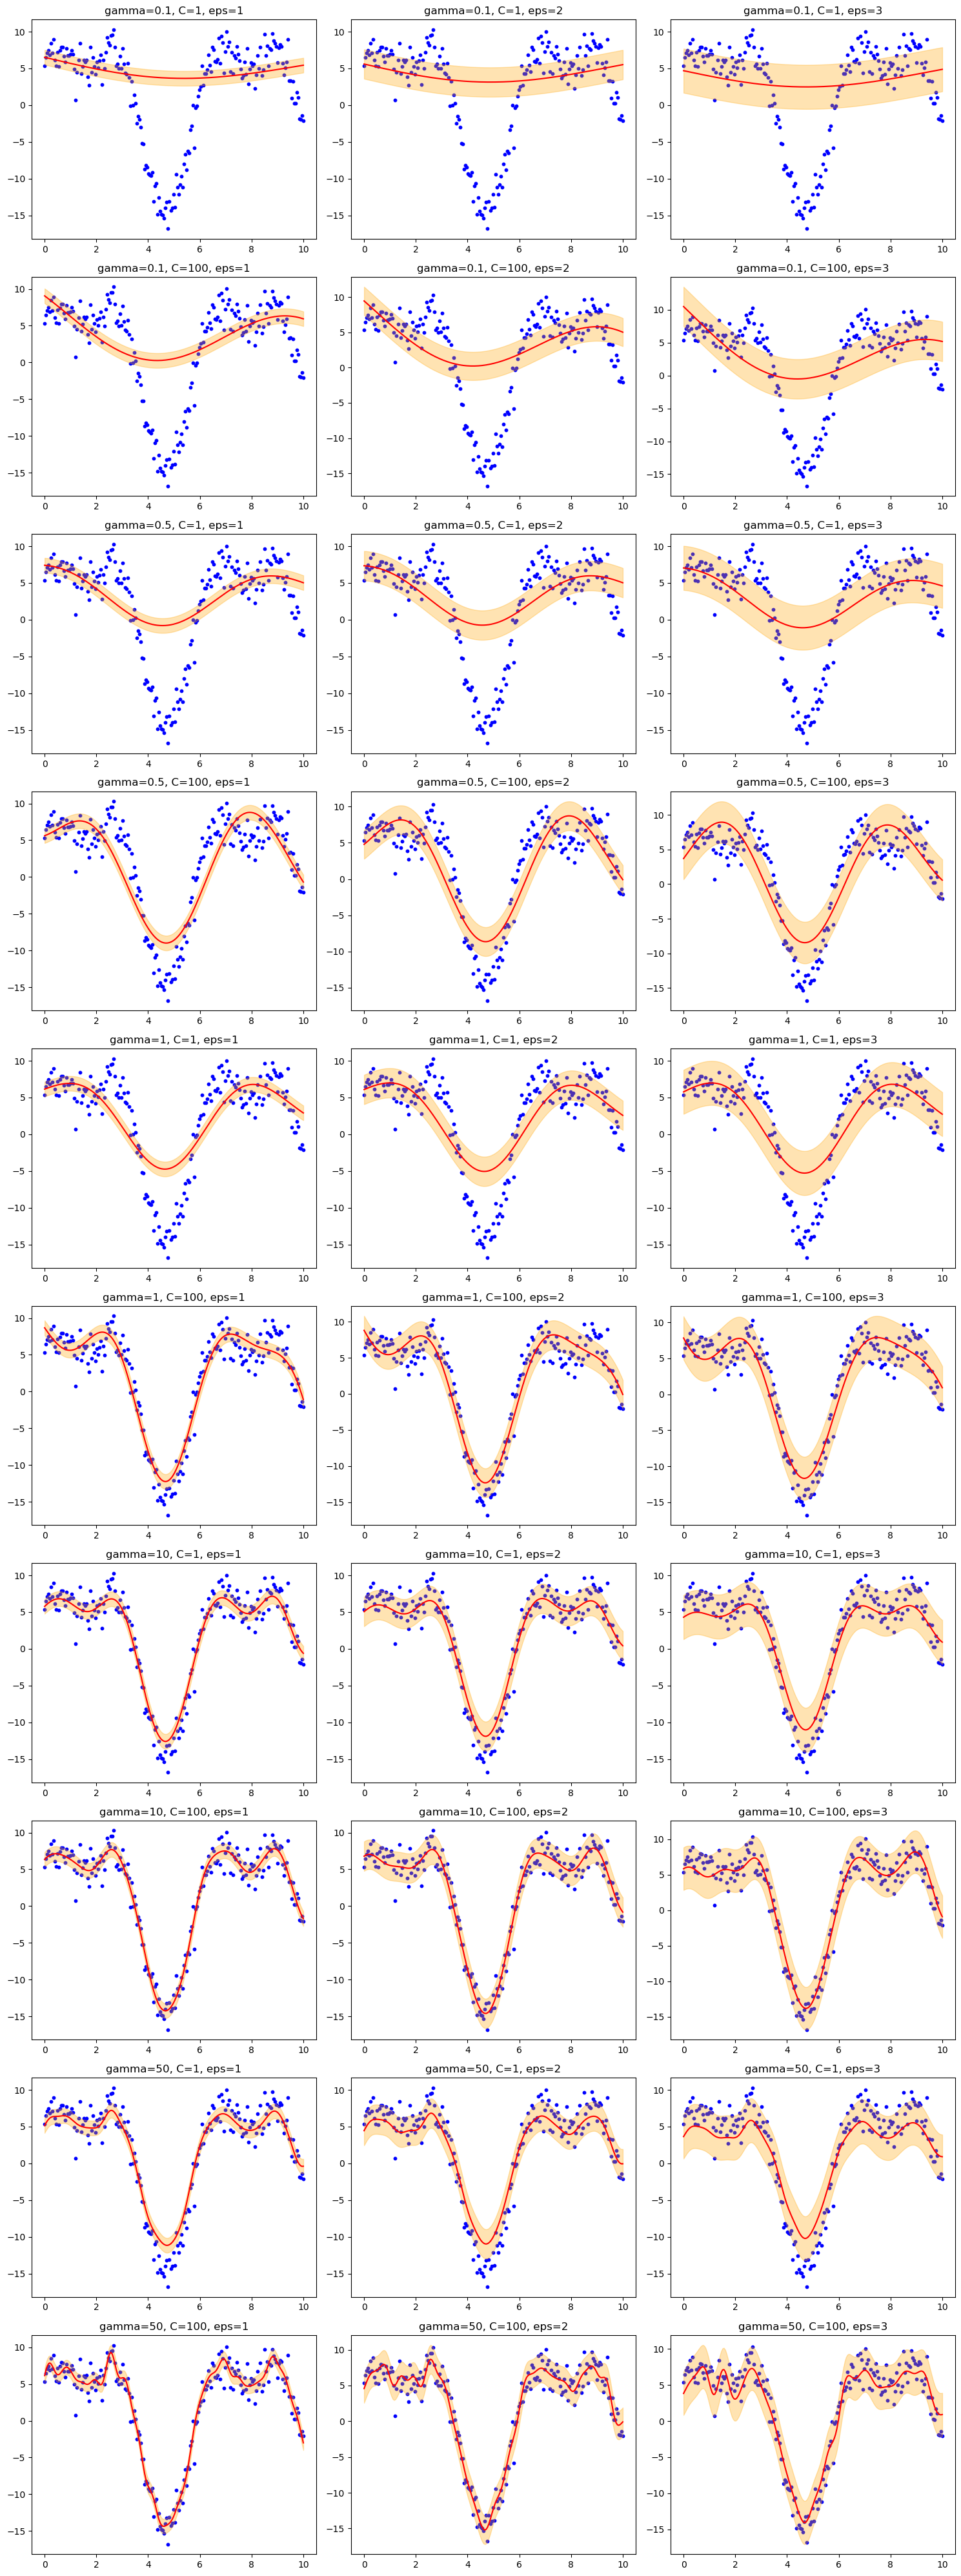

In [15]:
from joblib import Parallel, delayed
import itertools
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X = np.linspace(0, 10, 200).reshape(-1, 1)
y = np.sin(X.ravel()) * 10 + np.cos(2 * X.ravel()) * 5 + np.random.randn(200) * 1.5

epsilons = [1, 2, 3]
c = [1, 100]
gamma = [0.1, 0.5, 1, 10, 50]

param_combinations = list(itertools.product(gamma, c, epsilons))

def fit_and_predict(params):
    g, C_val, eps = params

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svr", SVR(kernel="rbf", C=C_val, epsilon=eps, gamma=g))
    ])

    model.fit(X, y)
    y_pred = model.predict(X)
    return (params, y_pred)

results = Parallel(n_jobs=-1, verbose=0)(delayed(fit_and_predict)(p) for p in param_combinations)

n = len(results)
cols = 3
rows = int(np.ceil(n / cols))

plt.figure(figsize=(5 * cols, 4 * rows))

for idx, (params, y_pred) in enumerate(results, 1):
    g, C_val, eps = params

    plt.subplot(rows, cols, idx)
    plt.scatter(X, y, color='blue', s=10, label='Data')
    plt.plot(X, y_pred, color='red', label='Prediction')
    plt.fill_between(X.ravel(), y_pred - eps, y_pred + eps, color='orange', alpha=0.3, label='ε-tube')
    plt.title(f"gamma={g}, C={C_val}, eps={eps}")
    plt.tight_layout()

plt.show()

This is a good example because give us some important information. First is that for example if $ gamma $ is too high we have overfitting, in fact the model fit all the data but it's not a good model because it fit also the noise. If $ gamma $ is too low we have underfitting, in fact the model is not able to capture the trend of the data. This is not the only things that affect the data because there is also $ C $ that affect the model. We can see clearly in the last two example, with gamma = 50 that whit C=1 we have a wrong function because don't capture the low peak but with C=1000 We have an overfitting of the data because take too much informaition like noise and we can see better than the previous example but the fuction it's too dirty.


## Sigmoid Kernel
The Sigmoid kernel is inspired by neural networks and is defined as:
$$ K(x_i, x_j) = \tanh(\gamma \langle x_i, x_j \rangle + \text{coef0}) $$
It can model complex relationships but is less commonly used than RBF or polynomial kernels. The parameters gamma and coef0(bias) control the shape of the kernel, affecting model flexibility and fit.

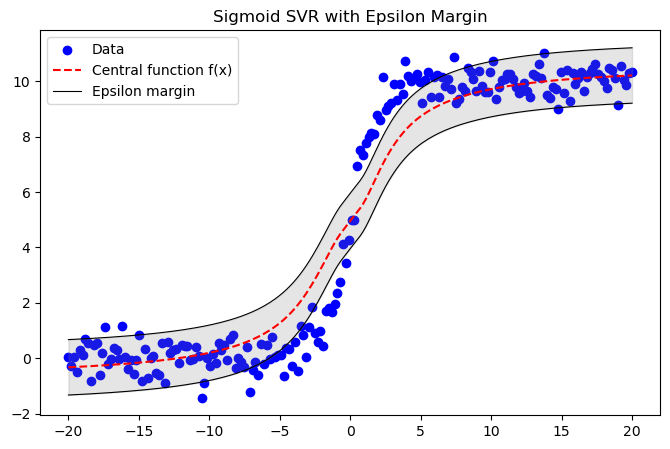

In [16]:
X = np.linspace(-20, 20, 200).reshape(-1, 1)
y = 10 / (1 + np.exp(-X.ravel())) + np.random.randn(200) * 0.5

# SVR model with Sigmoid
svr_sigmoid = SVR(kernel='sigmoid', C=0.1, epsilon=1, gamma=0.1, coef0=1)

svr_sigmoid.fit(X, y)

# Prediction
y_pred = svr_sigmoid.predict(X)

# Tube
epsilon = svr_sigmoid.epsilon
y_up = y_pred + epsilon
y_down = y_pred - epsilon

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, 'r--', label='Central function f(x)')
plt.plot(X, y_up, 'k-', linewidth=0.8, label='Epsilon margin')
plt.plot(X, y_down, 'k-', linewidth=0.8)
plt.fill_between(X.ravel(), y_down, y_up, color='gray', alpha=0.2)
plt.legend()
plt.title("Sigmoid SVR with Epsilon Margin")
plt.show()

I try to find I good fit with the data that i have. The type of data are different respect to the previous example. In this case the data have a sigmoid shape so I try to use a sigmoid kernel. The parameters that I use are:
- C=0.1: it's a small value that allow a more flexible model that can capture the trend of the data.
- epsilon=1: it's a moderate value that allow some tolerance to errors, balancing fit and generalization.
- gamma=0.1: it's a small value that make the model more global and less sensitive to individual data points.
- coef0=1: it's a moderate value that balances the influence of higher-order and lower-order terms in the kernel function.

I use this parameter but you can try to change them to see how they affect the model.
For example you can see easily how this model is complex, for example you can change C with an higher value and you can see the changes(you just need to change C=0.2).


## Real Case Study

Now we can see a real case study with a dataset. We can try with different type of kernel over dataset.
The dataset that we use is:

- Concrete Compressive Strength: This dataset, contains 1,030 instances of multivariate data designed for regression tasks to predict concrete compressive strength in MPa(MegaPascal). The target variable is determined by a highly nonlinear function of eight quantitative input features, which include:

    -   Cement: The quantity of cement($ kg/m^3 $)
    -   Blast Furnace Slag: Industrial byproduct used as a cementitious material($ kg/m^3 $)
    -   Fly Ash: Coal combustion residue used to improve durability ($ kg/m^3 $)
    -   Water: The amount of water in the mix ($ kg/m^3 $)
    -   Superplasticizer: Chemical additives used to reduce water content while maintaining workability ($ kg/m^3 $)
    -   Coarse Aggregate: Gravel ($ kg/m^3 $)
    -   Fine Aggregate: Sand ($ kg/m^3 $)
    -   Testing age in days (ranges from 1 to 365)

Since the data is provided in its raw form without scaling and contains no missing values.

I try to use different type of kernel and see the results. I also try to normalize the data and sort them to see how it affect the model.

I make a function that run all the model with different type of kernel and plot the results to avoid to repeat the code. When you call runAllSVRModel you can choose the column that you want to use, if you want normalize data and if you want order all the value.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

With this code, you can try different parameter values and see the difference. After that in the last block of code you can see the difference with presetting parameters to find the best.

In [2]:
# Database upload
df = pd.read_excel('data/concrete+compressive+strength/Concrete_Data.xls')
df.columns = ['cement', 'slag', 'fly_ash', 'water', 'superplasticizer',
              'coarse_agg', 'fine_agg', 'age', 'strength']


# Method to check all model with presetting parameters
def runAllSVRModel(df, feature_columns=None, target=None, normalize=True, test_size=0.2, sort_for_plot=True,
                   models=None, n_splits=5, n_repeats=2):
    # Extract data
    y = df[[str(target)]].values
    X = df[feature_columns].values

    # Normalize
    if normalize:
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_scaled = scaler_X.fit_transform(X)
        y_scaled = scaler_y.fit_transform(y).ravel()
    else:
        X_scaled = X
        y_scaled = y.ravel()
        scaler_y = None

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=test_size, random_state=42)

    results = {}
    colors = {"Linear": "green", "Polynomial": "red", "RBF": "purple", "Sigmoid": "orange"}

    print(f"\n=== SVR Evaluation on Target '{target}' ({'Normalized' if normalize else 'Raw'}) ===\n")

    for name, model in models.items():
        # Fit
        model.fit(X_train, y_train)
        y_pred_scaled = model.predict(X_test)

        # Inverse scaling per le metriche reali
        if normalize:
            y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
            y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))
        else:
            y_pred = y_pred_scaled.reshape(-1, 1)
            y_test_orig = y_test.reshape(-1, 1)

        # Compute metrics
        mse = mean_squared_error(y_test_orig, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test_orig, y_pred)
        r2 = r2_score(y_test_orig, y_pred)
        results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2, "pred": y_pred_scaled}

        # Cross-validation performance
        cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=0)
        cv_scores = cross_val_score(model, X_scaled, y_scaled, scoring='neg_root_mean_squared_error', cv=cv)
        results[name]['CV_RMSE_mean'] = -cv_scores.mean()
        results[name]['CV_RMSE_std'] = cv_scores.std()

    # Print results
    print("Model Performance Summary:")
    print(f"{'Model':<12} | {'RMSE':<8} | {'MAE':<8} | {'R²':<6} | {'CV-RMSE'}")
    print("-" * 75)
    for name, metrics in results.items():
        print(f"{name:<12} | {metrics['RMSE']:.3f}    | {metrics['MAE']:.3f} | {metrics['R2']:.3f}  | "
              f"{metrics['CV_RMSE_mean']:.3f} ± {metrics['CV_RMSE_std']:.3f}")

    # Plotting logic (if dim. is more than 2, skip)
    if X.shape[1] == 1:
        plt.figure(figsize=(12, 7))
        plt.scatter(X, y, color='blue', s=10, alpha=0.5, label='Data')
        sort_idx = np.argsort(X_scaled.ravel()) if sort_for_plot else np.arange(len(X_scaled))
        X_sorted = X_scaled[sort_idx]
        X_sorted_orig = X[sort_idx]

        for name, model in models.items():
            y_plot_scaled = model.predict(X_sorted)
            y_plot = scaler_y.inverse_transform(y_plot_scaled.reshape(-1, 1)) if normalize else y_plot_scaled.reshape(
                -1, 1)
            plt.plot(X_sorted_orig, y_plot, color=colors.get(name, 'black'), linewidth=2, label=f"{name} SVR")

        plt.title(f"SVR Models - Target: {target}")
        plt.legend()
        plt.show()


# Model to test
models = {
    "Linear": SVR(kernel='linear', C=100, epsilon=0.1),
    "Polynomial": SVR(kernel='poly', degree=3, C=100, epsilon=0.1, coef0=1),
    "RBF": SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale'),
    "Sigmoid": SVR(kernel='sigmoid', C=0.1, epsilon=1, gamma='scale', coef0=1)
}

feature_cols = ['cement', 'slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_agg', 'fine_agg', 'age']

runAllSVRModel(
    df=df,
    feature_columns=feature_cols,
    target='strength',
    models=models,
    normalize=True
)


=== SVR Evaluation on Target 'strength' (Normalized) ===

Model Performance Summary:
Model        | RMSE     | MAE      | MAPE     | R²     | CV-RMSE
---------------------------------------------------------------------------
Linear       | 10.002    | 7.701    | 23.42%    | 0.612  | 0.131 ± 0.006
Polynomial   | 7.707    | 5.281    | 16.65%    | 0.769  | 0.089 ± 0.007
RBF          | 6.441    | 5.098    | 16.61%    | 0.839  | 0.083 ± 0.004
Sigmoid      | 17.436    | 14.366    | 42.00%    | -0.180  | 0.223 ± 0.009


Now that we are working with a much larger dataset and an higher number of features than before, manually testing all kernel types along with their corresponding hyperparameters becomes a challenging and time-consuming task.
For this reason, we will use the Grid Search Cross-Validation technique, which automates the process of finding the optimal hyperparameters for our SVR model.
After performing the Grid Search, we can compare the results obtained with the different kernels and select the one that delivers the best performance in terms of accuracy and generalization on the test data. This will allow us to evaluate how each kernel behaves with various parameter configurations and determine which one best fits the dataset we are working with.
The following code is computationally intensive, as it uses most of the CPU resources to parallelize the process. If you wish, you can modify the parameters inside param_grid to reduce computation time or explore different values.
The pipeline consists of the following steps:
- SimpleImputer: Handles missing values by replacing them with the median of each feature(if the dataset contains no missing value, this is unused).
- StandardScaler: Standardizes the features by removing the mean and scaling to unit variance.
- SVR: The Support Vector Regression model itself, which will be tuned using Grid Search.

In the Grid Search, we define a parameter grid that includes different kernel types (RBF, linear, polynomial, sigmoid), along with a range of hyperparameters specific to each kernel.

As above the Grid Search evaluates all combinations of these parameters using 5-fold cross-validation and multiple scoring metrics (MSE, MAE, R²).

- Mean Absolute Error: $ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $

- Mean Square Error: $ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

- Root Mean Square Error: $ \text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 } $

- Roor Square: $ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

df = pd.read_excel('data/concrete+compressive+strength/Concrete_Data.xls')
# change the name(in the dataset there is a description for all column)
df.columns = ['cement', 'slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_agg', 'fine_agg', 'age', 'strength']

# Use strength like target
X = df.drop('strength', axis=1)
y = df['strength']

# Split Train/Test
param_grid = [
    {
        'svr__kernel': ['rbf'],
        'svr__C': [0.1, 1, 10, 100, 1000],
        'svr__gamma': [0.01, 0.1, 1, 10, 50],
        'svr__epsilon': [0.01, 0.1, 0.5, 1, 10, 50]
    },
    {
        'svr__kernel': ['linear'],
        'svr__C': [0.1, 1, 10, 100, 1000],
        'svr__epsilon': [0.01, 0.1, 0.5, 1, 10, 50]
    },
    {
        'svr__kernel': ['poly'],
        'svr__C': [0.1, 1, 10],
        'svr__degree': [2, 3, 4],
        'svr__epsilon': [0.01, 0.1, 0.5],
        'svr__coef0': [0, 0.1, 1]
    },
    {
        'svr__kernel': ['sigmoid'],
        'svr__C': [0.01, 0.1, 1, 10, 100, 1000],
        'svr__gamma': [0.01, 0.1, 1, 10, 50],
        'svr__coef0': [0, 0.1, 1, 10, 50],
        'svr__epsilon': [0.01, 0.1, 0.5, 1, 10, 50]
    }
]

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])

scoring = {
    'MSE': 'neg_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring=scoring,
    refit='R2',
    verbose=2,
    n_jobs=-1
)

print("Running Grid Search to find optimal parameters...")
grid_search.fit(X, y)

results = pd.DataFrame(grid_search.cv_results_)
results['MSE'] = -results['mean_test_MSE']
results['MAE'] = -results['mean_test_MAE']
results['R2'] = results['mean_test_R2']

best_per_kernel = (results.sort_values('MSE').groupby('param_svr__kernel').first().reset_index())

summary_df = best_per_kernel[['param_svr__kernel', 'MSE', 'MAE', 'R2']].copy()

summary_df.rename(columns={
    'param_svr__kernel': 'Kernel',
    'MSE': 'Mean Squared Error',
    'MAE': 'Mean Absolute Error',
    'R2': 'R² Score'
}, inplace=True)

param_cols = [c for c in best_per_kernel.columns if c.startswith('param_')]
# in-line function to choose the best iteration of that model with the best parameters
summary_df['Best Parameters'] = best_per_kernel[param_cols].apply(
    lambda row: {c.replace('param_', ''): row[c] for c in param_cols if pd.notna(row[c])},
    axis=1
)

summary_df = summary_df.round(3)

print("\n Summary. Best performance:")
pd.set_option('display.max_colwidth', None)
display(summary_df)


Running Grid Search to find optimal parameters...
Fitting 5 folds for each of 1161 candidates, totalling 5805 fits
[CV] END svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.01, svr__kernel=rbf; total time=   0.1s
[CV] END svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.01, svr__kernel=rbf; total time=   0.1s
[CV] END svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.01, svr__kernel=rbf; total time=   0.1s
[CV] END svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.01, svr__kernel=rbf; total time=   0.1s
[CV] END svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.01, svr__kernel=rbf; total time=   0.1s
[CV] END svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1, svr__kernel=rbf; total time=   0.1s
[CV] END svr__C=0.1, svr__epsilon=0.01, svr__gamma=0.1, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.1, svr__epsilon=0.01, svr__gamma=1

Kernel  Mean Squared Error  Mean Absolute Error  R² Score  \
0   linear             128.549                8.991     0.452   
1     poly             100.876                7.851     0.526   
2      rbf              86.696                7.360     0.616   
3  sigmoid             138.493                9.549     0.396   

                                                                                           Best Parameters  
0                                           {'svr__kernel': 'linear', 'svr__C': 1.0, 'svr__epsilon': 10.0}  
1       {'svr__kernel': 'poly', 'svr__C': 1.0, 'svr__epsilon': 0.5, 'svr__coef0': 1.0, 'svr__degree': 2.0}  
2                        {'svr__kernel': 'rbf', 'svr__C': 100.0, 'svr__epsilon': 10.0, 'svr__gamma': 0.01}  
3  {'svr__kernel': 'sigmoid', 'svr__C': 10.0, 'svr__epsilon': 10.0, 'svr__gamma': 0.01, 'svr__coef0': 0.0}

The experimental results demonstrate that the relationship between concrete ingredients and compressive strength is inherently non-linear, as evidenced by the suboptimal performance of the Linear and Sigmoid kernels. Conversely, both the RBF and Polynomial kernels achieved significantly higher accuracy with $R^2$ and minimized error rates. Ultimately, the RBF and polynomial kernel emerged are very similar have a better response.

It's important to remember that MSE and MAE are error metrics (where lower values are better), while $R^2$ is a goodness-of-fit metric (where higher values are better). Therefore, when evaluating model performance, we look for the lowest MSE and MAE values or the highest $R^2$ value.

We are now working in a high-dimensional space, so it’s not possible to plot the results directly. We can only evaluate the final performance of the best model on the test set.